# Домашнее задание №7



Epoch 1/5

3348/3348 - 5s - loss: 0.0145 - 5s/epoch - 2ms/step
Epoch 2/5
3348/3348 - 4s - loss: 7.6277e-04 - 4s/epoch - 1ms/step
Epoch 3/5
3348/3348 - 4s - loss: 4.4497e-04 - 4s/epoch - 1ms/step
Epoch 4/5
3348/3348 - 4s - loss: 2.5312e-04 - 4s/epoch - 1ms/step
Epoch 5/5
3348/3348 - 4s - loss: 1.8061e-04 - 4s/epoch - 1ms/step
52/52 [==============================] - 0s 998us/step
Train Score: 11.53 RMSE
Test Score: 10.62 RMSE


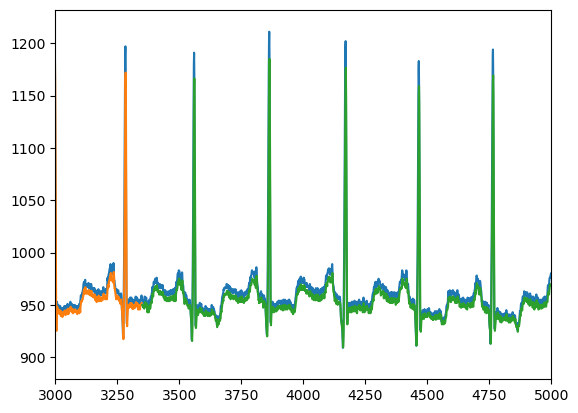

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Функция для создания набора данных для LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        # Создаем набор данных X=t и Y=t+1
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Устанавливаем сид для воспроизводимости результатов
tf.random.set_seed(7)

# Загружаем данные
dataframe = read_csv('100.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# Нормализуем данные в диапазоне [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Ограничиваем набор данных первыми 5000
dataset = dataset[0:5000]

# Разделяем на обучающую и тестовую выборки
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Преобразуем в формат X=t и Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Преобразуем входные данные к виду [образцы, временные шаги, признаки]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Создаем и компилируем модель LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Обучаем модель
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

# Делаем предсказания
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Инвертируем предсказания обратно к исходному масштабу
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Рассчитываем корень mse
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Сдвигаем предсказания для построения графика
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Сдвигаем тест для построения графика
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Строим базовый график и предсказания
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlim([3000,5000])
plt.show()

## Комментарии:

### Подготовка данных:

* Данные нормализуются в диапазоне [0, 1] с использованием MinMaxScaler.
* Ограничиваемся первыми 5000 точками.

### Построение обучающей и тестовой выборок:

* Набор данных разделяется на обучающую и тестовую выборки.
* Создаются последовательности X=t и Y=t+1 для обучения и тестирования.

### Подготовка данных для LSTM:

* Входные данные преобразуются в трехмерный массив [образцы, временные шаги, признаки] для использования в LSTM.

### Определение и компиляция LSTM модели:

* Создается модель Sequential с одним слоем LSTM, содержащим 4 блока, и одним полносвязанным слоем.
* Модель компилируется с использованием mse в качестве функции потерь и оптимизатора Adam.

### Обучение модели:

* Модель обучается на обучающем наборе в течение 5 эпох с размером пакета 1.


### Предсказания и оценка результатов:

* Делаются предсказания для обучающей и тестовой выборок.
* Предсказания инвертируются обратно к исходному масштабу.
* Рассчитываются mse обучающей и тестовой выборок.

## Улучшения

* Использовать больше данных для обучения модели (Можно попробовать поменять значение соотношения между длиной обучающей и тестовой выборок в строке, где определяется train_size).
* Изменить размер окна прогнозирования (look_back)